<a href="https://colab.research.google.com/github/CraigDaGama/SmartED-AI/blob/main/Pathfinding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import heapq

In [12]:
class Grid:
    def __init__(self, width, height, start, goal, obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.nodes = [[(x, y) for y in range(height)] for x in range(width)]

    def is_valid(self, node):
        x, y = node
        return 0 <= x < self.width and 0 <= y < self.height and node not in self.obstacles

    def get_neighbors(self, node):
        x, y = node
        neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        valid_neighbors = [neighbor for neighbor in neighbors if self.is_valid(neighbor)]
        return valid_neighbors

In [13]:
class AStar:
    def __init__(self, grid):
        self.grid = grid
        self.start = grid.start
        self.goal = grid.goal

    def manhattan_distance(self, node1, node2):
        return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])

    def reconstruct_path(self, came_from, current):
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(self.start)
        path.reverse()
        return path

    def find_path(self):
        open_set = []
        heapq.heappush(open_set, (0, self.start))
        came_from = {}
        g_score = {node: float('inf') for row in self.grid.nodes for node in row}
        g_score[self.start] = 0
        f_score = {node: float('inf') for row in self.grid.nodes for node in row}
        f_score[self.start] = self.manhattan_distance(self.start, self.goal)

        while open_set:
            current_f, current = heapq.heappop(open_set)

            if current == self.goal:
                return self.reconstruct_path(came_from, current)

            for neighbor in self.grid.get_neighbors(current):
                tentative_g = g_score[current] + 1
                if tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + self.manhattan_distance(neighbor, self.goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return None  # No path found

In [14]:
def visualize_path(grid, path):
    plt.figure(figsize=(8, 8))
    for x in range(grid.width):
        for y in range(grid.height):
            if (x, y) in grid.obstacles:
                plt.fill_between([x, x+1], [y, y], [y+1, y+1], color='gray')
            else:
                plt.fill_between([x, x+1], [y, y], [y+1, y+1], color='white')

    for node in path:
        plt.text(node[0] + 0.5, node[1] + 0.5, 'X', ha='center', va='center', fontsize=10, color='green')

    plt.plot([grid.start[0] + 0.5], [grid.start[1] + 0.5], marker='o', markersize=8, color='blue', label='Start')
    plt.plot([grid.goal[0] + 0.5], [grid.goal[1] + 0.5], marker='o', markersize=8, color='red', label='Goal')

    plt.xlim(0, grid.width)
    plt.ylim(0, grid.height)
    plt.gca().invert_yaxis()
    plt.title('A* Pathfinding')
    plt.legend()
    plt.show()


Path found: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)]


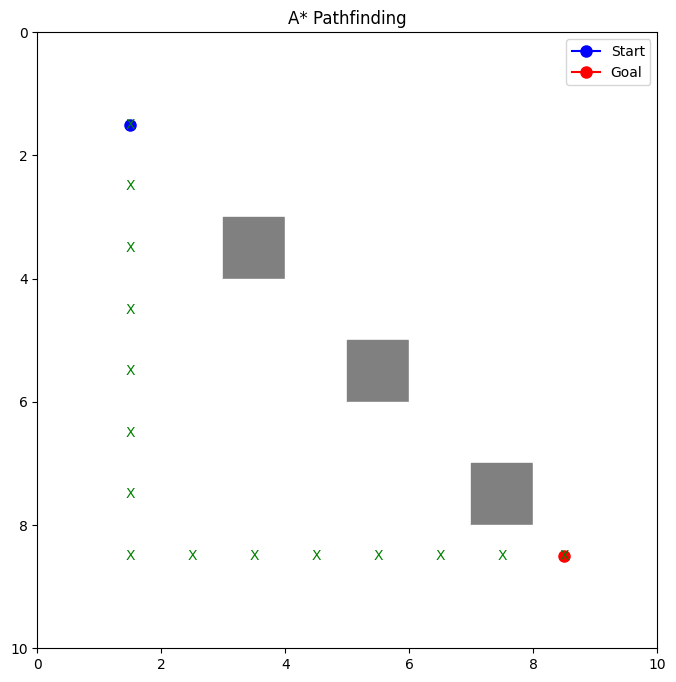

In [15]:
# Example usage
start = (1, 1)
goal = (8, 8)
obstacles = [(3, 3), (5, 5), (7, 7)]
grid = Grid(10, 10, start, goal, obstacles)
astar = AStar(grid)
path = astar.find_path()

if path:
    print("Path found:", path)
    visualize_path(grid, path)
else:
    print("No path found.")
